In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score , roc_curve  , accuracy_score

import joblib
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
print("libraries loaded")

libraries loaded


In [2]:
#Genrating synthetic data

n = 15000

departments = np.random.choice(['Sales' , 'Research and development' , 'Human Ressources' ] , n , p = [0.33 , 0.56 , 0.11])
role_map = {
    'Sales' : ['Sales Exceutive ' , 'Sales Representative ' , 'Manager' ],
    'Research and development' : ['Research Scientist' , 'Laboratory Technician' , 'Manufacturing Director ' , 'Research Director' ],
    'Human Ressources': ['Human Resources' , 'Manager' ]}
job_role = [np.random.choice(role_map[d]) for d in departments]

age = np.random.normal(37 , 9 , n).clip (18 , 60).astype(int)
monthly_income = np.random.lognormal (8.5 , 0.6 , n).clip(1000 , 20000).astype(int)
years_at_co = np.random.exponential(7,n).clip(0,40).astype(int)
overtime = np.random.choice(['Yes' , 'No' ] , n , p=[0.28 , 0.72])
distance = np.random.exponential(9,n).clip(1,29).astype(int)
yrs_promo = np.random.exponential(2 , n).clip(0,15).astype(int)
job_sat = np.random.choice([1,2,3,4] , n ,p =[0.18,0.22 , 0.33 ,0.27])
wlb = np.random.choice([1,2,3,4] , n , p=[0.10,0.25 , 0.40, 0.25])
num_companies = np.random.choice(range(10) ,n )
edu_field  = np.random.choice(['Life Sciences' , 'Medical' , 'Marketing' , 'Technical Degree' ,'Other' , 'Human Resources'] , n , p = [0.41 , 0.27 , 0.11 ,0.09 , 0.08 ,0.04])
maritial_stat = np.random.choice(['Single' , ' Married' , 'Divorced' ] , n , p  = [0.32 , 0.46 , 0.22])
gender = np.random.choice(["Male" , "Female"] , n , p = [0.60 , 0.40])
env_sat = np.random.choice ([1,2,3,4] , n , p = [0.15 , 0.23 , 0.35 , 0.27])
yrs_role = np.random.exponential(4 , n ).clip(0,18).astype(int)
training = np.random.choice(range(7), n)

att_prob = np.clip(0.05 + 0.25*(overtime=='Yes')
                   + 0.15*(job_sat <=2)
                   +0.10*(monthly_income <3000)
                   +0.08*(distance>20)
                   +0.10 *(yrs_promo>5)
                   +0.08*(wlb >20)
                   +0.07*(maritial_stat =='Single')
                   +0.05*(num_companies >5)
                   -0.05*(years_at_co >10) , 0.03 , 0.90)

attrition = np.where(np.random.random(n) < att_prob , "Yes" , "No")

df = pd.DataFrame({'Age':age , 'Attrition':attrition ,'Department' : departments , 'DistanceFromHome' : distance , 'EducationField' :edu_field , 'EnvironmentSatisfaction' : env_sat , 'Gender' : gender , 'JobRole': job_role , 'JobSatisfaction' : job_sat  , 'MaritalStatus' : maritial_stat , 'MonthlyIncome' : monthly_income , 'NumCompaniesworked' : num_companies , 'Overtime' : overtime , 'WorkLifeBalance' : wlb , 'YearsAtCompany' : years_at_co , 'YearsInCurrentRole' :yrs_role , 'YearsSinceLastPromotion' : yrs_promo , 'TrainingTimesLastYear' : training })

print(f'Dataset Shape : {df.shape}')
print(f'Attrition Rate : {(df.Attrition=="Yes").mean():.1%}')
df.head()


Dataset Shape : (15000, 18)
Attrition Rate : 24.4%


,Age,Attrition,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesworked,Overtime,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,TrainingTimesLastYear
0,22,No,Research and development,15,Life Sciences,1,Female,Research Director,3,Married,10048,6,No,3,14,7,1,6
1,36,No,Human Ressources,2,Life Sciences,1,Male,Manager,4,Single,7620,2,No,2,9,4,0,2
2,30,No,Research and development,1,Medical,3,Male,Research Scientist,2,Married,5955,1,No,3,1,4,0,4
3,44,No,Research and development,1,Medical,2,Female,Research Director,4,Divorced,4877,8,No,3,3,2,2,0
4,43,No,Sales,29,Other,1,Male,Sales Exceutive,3,Divorced,2852,7,No,3,25,0,1,2


In [3]:
#missing values and basic  info
print("==Missing values ==")
print(df.isnull().sum())
print(f'\nTotal nulls :{df.isnull().sum().sum()}(clean dataset)')
print('\n==Data Types==')
print(df.dtypes)
print('\n==Numeric Summary==')
df.describe().round(2)

==Missing values ==
Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesworked         0
Overtime                   0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
TrainingTimesLastYear      0
dtype: int64

Total nulls :0(clean dataset)

==Data Types==
Age                         int32
Attrition                  object
Department                 object
DistanceFromHome            int32
EducationField             object
EnvironmentSatisfaction     int32
Gender                     object
JobRole                    object
JobSatisfaction             int32
MaritalStatus              object
MonthlyIncome               int32
NumCompaniesworked      

,Age,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesworked,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,TrainingTimesLastYear
count,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00
mean,36.49,8.20,2.75,2.68,5818.92,4.54,2.82,6.46,3.53,1.54,3.01
std,8.80,7.62,1.02,1.06,3587.58,2.87,0.92,6.74,3.88,1.95,2.00
min,18.00,1.00,1.00,1.00,1000.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,2.00,2.00,2.00,3260.00,2.00,2.00,2.00,1.00,0.00,1.00
50%,36.00,6.00,3.00,3.00,4906.00,5.00,3.00,4.00,2.00,1.00,3.00
75%,43.00,12.00,4.00,4.00,7367.75,7.00,4.00,9.00,5.00,2.00,5.00
max,60.00,29.00,4.00,4.00,20000.00,9.00,4.00,40.00,18.00,15.00,6.00


In [4]:
#Encoding

df_model = df.copy()
df_model['OverTime_enc'] =(df_model['Overtime']=='Yes').astype(int)
print('Labek encoded :Overtime ->0/1')

#One-Hot encoding 
df_model = pd.get_dummies(df_model , columns =['Department' ,'JobRole' , 'EducationField' , 'MaritalStatus' ,'Gender'],drop_first = True)
print(f'One-Hot Encoded . New Shape : {df_model.shape}')

y = (df['Attrition'] == 'Yes').astype(int)
x = df_model.select_dtypes(include = [np.number , bool]).drop(columns=['OverTime_enc'] , errors ='ignore')
x['OverTime_enc'] = df_model['OverTime_enc']

x = x[[c for c in  x.columns if 'Attrition' not in c]].astype(float)

print(f'\nFeatures matrix x :{x.shape}')
print(f'Target y - left: {y.sum()} , Stayed: {(y==0).sum()}') 

Labek encoded :Overtime ->0/1
One-Hot Encoded . New Shape : (15000, 31)

Features matrix x :(15000, 29)
Target y - left: 3660 , Stayed: 11340


In [5]:
x_train , x_test , y_train  , y_test = train_test_split(x , y ,test_size = 0.20 , random_state = 42 , stratify =y)

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

print(f'train: {len(x_train)} samples | Test :{len(x_test)} samples')
print(f'Train attrition rate : {y_train.mean():.1%}')
print(f'Test attrition rate : {y_test.mean():.1%}')

train: 12000 samples | Test :3000 samples
Train attrition rate : 24.4%
Test attrition rate : 24.4%


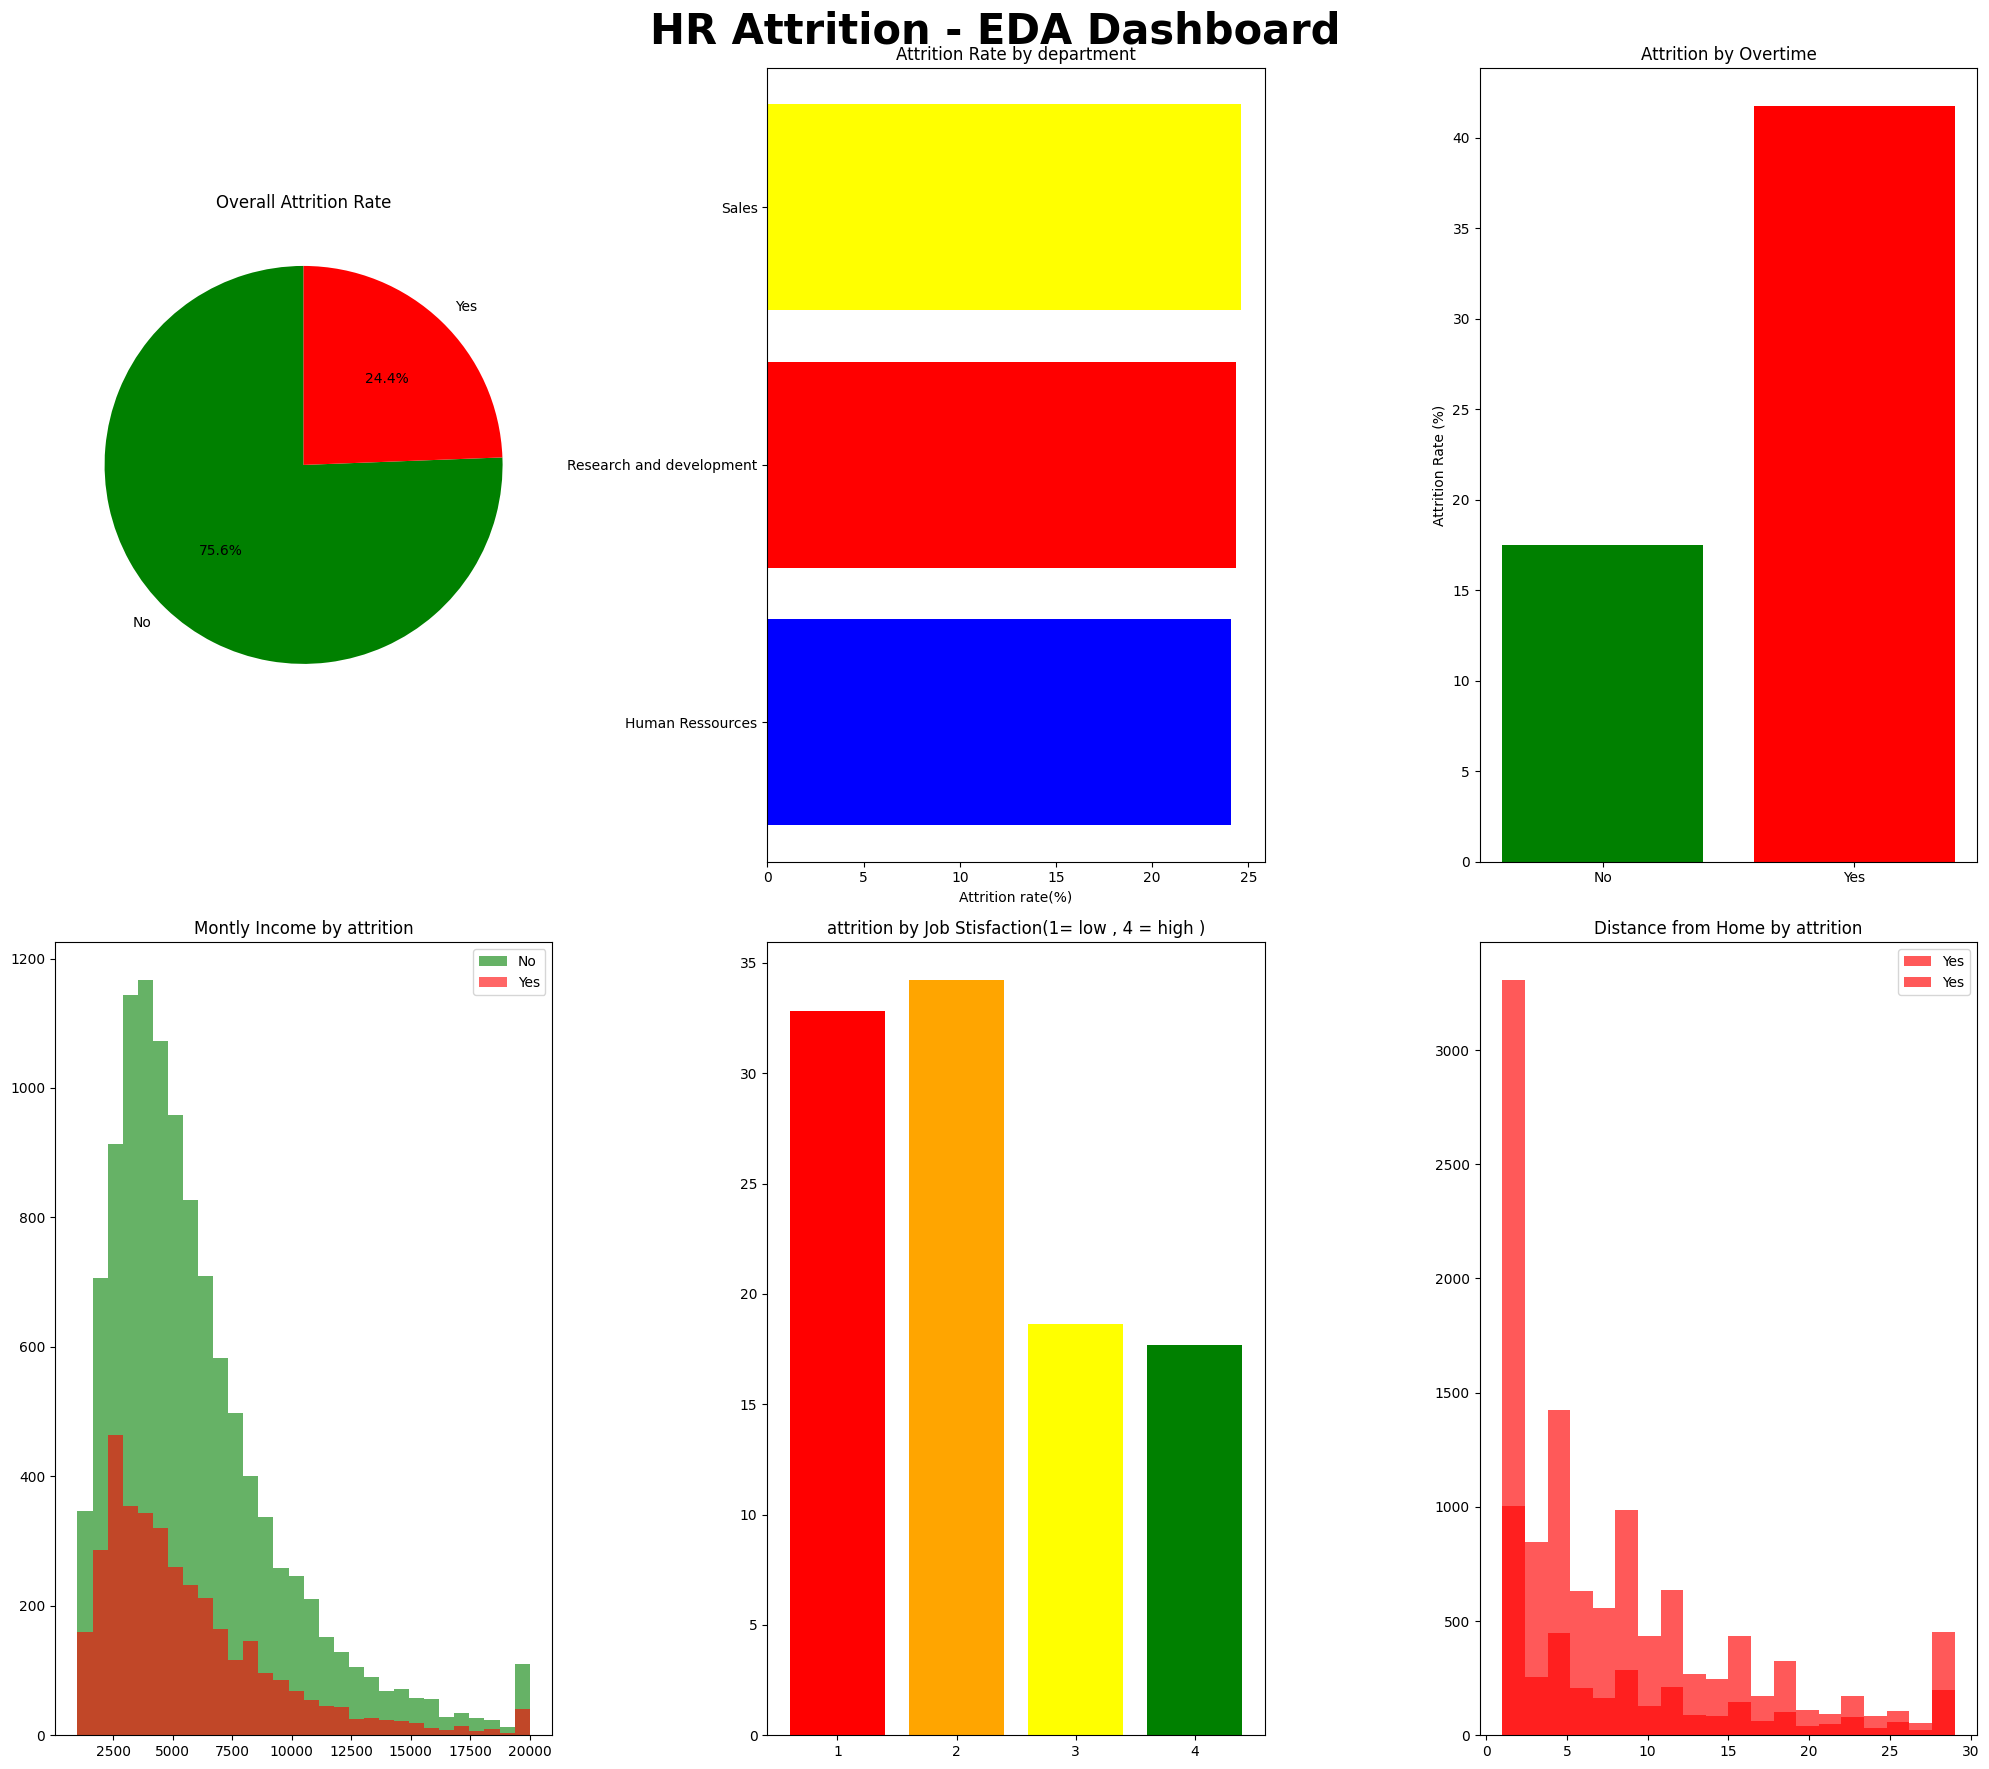

In [6]:
#EDA
colors = {'Yes': 'red' , 'No': 'green'}
fig,axes = plt.subplots(2,3 , figsize = (20,18))
fig.suptitle("HR Attrition - EDA Dashboard" , fontsize = 30 , fontweight = "bold")

#overall attrition
att_counts =  df['Attrition'].value_counts()
axes[0,0].pie(att_counts.values , labels = att_counts.index, colors = ['green' , 'red'] , autopct ='%1.1f%%' ,startangle =90)
axes[0,0].set_title("Overall Attrition Rate")

#department
dept_att = df.groupby('Department')['Attrition'].apply(lambda x:(x=='Yes').mean()*100).sort_values()
axes[0,1].barh(dept_att.index , dept_att.values , color=['blue', 'red' , 'yellow'])
axes[0,1].set_title('Attrition Rate by department')
axes[0,1].set_xlabel('Attrition rate(%)')

#overtime
ot_att = df.groupby('Overtime')['Attrition'].apply(lambda x: (x=='Yes').mean()*100)
axes[0,2].bar(ot_att.index , ot_att.values , color = ['green', 'red'])
axes[0,2].set_title('Attrition by Overtime')
axes[0,2].set_ylabel('Attrition Rate (%)')

#Monthly income
for label , grp in df.groupby('Attrition'):
    axes[1,0].hist(grp['MonthlyIncome'] , bins = 30 ,alpha=0.6 ,label=label , color = colors[label])
axes[1,0].set_title('Montly Income by attrition')
axes[1,0].legend()

#job satisfaction
sat_att = df.groupby('JobSatisfaction')['Attrition'].apply(lambda x :(x=='Yes').mean()*100)
axes[1,1].bar(sat_att.index.astype(str) , sat_att.values , color = ['red' , 'orange' , 'yellow' ,'green'])
axes [1,1].set_title('attrition by Job Stisfaction(1= low , 4 = high )')

#Distance from home 
for labrl , grp in df.groupby('Attrition'):
    axes[1,2].hist(grp['DistanceFromHome'] , bins=20 , alpha=0.65 ,label =label , color = colors[label])
axes[1,2].set_title('Distance from Home by attrition')
axes[1,2].legend()

plt.tight_layout()
plt.show()

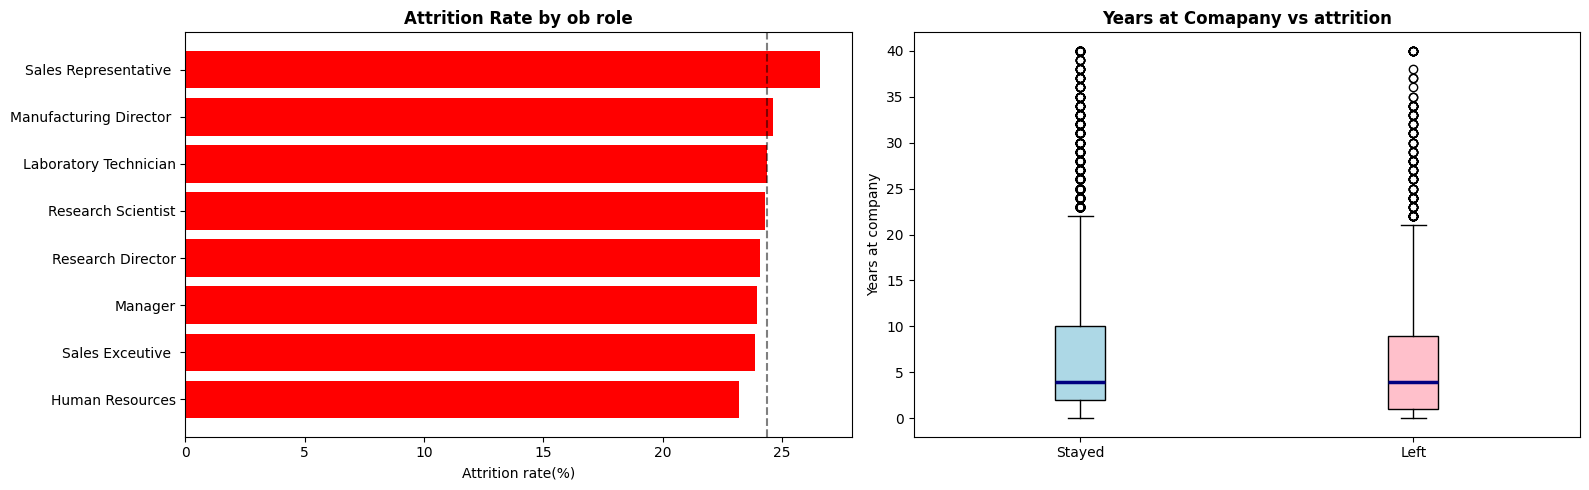


 Observation : Leavers have median tenure of4 years vs4 years for stayers.
Attrition spikes in the first 2 years - critical onboarding window


In [7]:
# job role
fig , axes = plt.subplots(1,2 , figsize = (16 , 5))
role_att = df.groupby ('JobRole')['Attrition'].apply(lambda x :(x=='Yes').mean()*100).sort_values(ascending =False)
bar_colors = ['red' if v>20 else 'orange' if v>15 else 'blue' for v in role_att.values]
axes[0].barh( role_att.index[::-1] , role_att.values[::-1] , color = bar_colors[::-1])
axes[0].axvline(role_att.mean() , color ='k' , linestyle ='--' ,alpha=0.5)
axes[0].set_title('Attrition Rate by ob role' , fontweight ='bold')
axes[0].set_xlabel('Attrition rate(%)')

#years at comapany

bp =axes[1].boxplot([df[df['Attrition']=='No']['YearsAtCompany'],df[df['Attrition'] =='Yes']['YearsAtCompany']], labels = ['Stayed' ,'Left'] ,patch_artist =True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('pink')
for median in bp['medians']:
    median.set(color ='navy' , linewidth = 2.5)
axes[1].set_title('Years at Comapany vs attrition' , fontweight = 'bold')
axes[1].set_ylabel('Years at company')

plt.tight_layout()
plt.show()
print(f'\n Observation : Leavers have median tenure of'
      f'{df[df['Attrition']=='Yes']['YearsAtCompany'].median():.0f} years vs' 
    f'{df[df['Attrition']=='No']['YearsAtCompany'].median():.0f} years for stayers.')
print('Attrition spikes in the first 2 years - critical onboarding window')

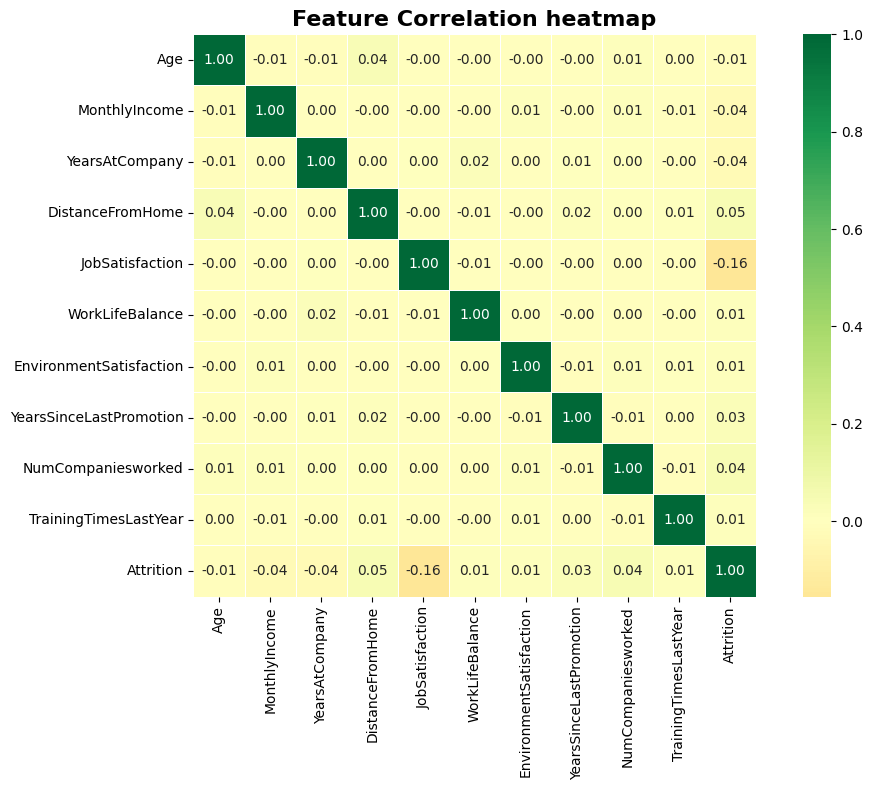

In [8]:
#correlation
numeric_cols = ['Age','MonthlyIncome','YearsAtCompany','DistanceFromHome','JobSatisfaction','WorkLifeBalance','EnvironmentSatisfaction','YearsSinceLastPromotion','NumCompaniesworked','TrainingTimesLastYear']
df_corr = df[numeric_cols].copy()
df_corr['Attrition'] = (df['Attrition'] =='Yes').astype(int)
plt.figure(figsize = (11,8))
sns.heatmap(df_corr.corr() , annot =True ,fmt = '.2f' , cmap = 'RdYlGn' , center = 0 ,square= True , linewidth = 0.5)
plt.title("Feature Correlation heatmap" , fontsize = 16 , fontweight = 'bold')
plt.tight_layout()
plt.show()
               

In [9]:
#logistic regreesion
lr = LogisticRegression(max_iter = 2000 , random_state=42 , class_weight ='balanced')
lr.fit(x_train_sc , y_train)
lr_pred = lr.predict(x_test_sc)
lr_prob = lr.predict_proba(x_test_sc)[:,1]
lr_auc = roc_auc_score(y_test , lr_prob)

print("==Logistic Regression ==")
print(f'Accuracy : {accuracy_score(y_test , lr_pred):.3f} | AUC-ROC :{lr_auc :.3f}')
print(classification_report(y_test , lr_pred , target_names =['Stayed' , 'Left']))

==Logistic Regression ==
Accuracy : 0.672 | AUC-ROC :0.715
              precision    recall  f1-score   support

      Stayed       0.85      0.68      0.76      2268
        Left       0.39      0.64      0.49       732

    accuracy                           0.67      3000
   macro avg       0.62      0.66      0.62      3000
weighted avg       0.74      0.67      0.69      3000



In [10]:
rf = RandomForestClassifier(n_estimators = 500 , random_state =42 , class_weight ='balanced' , n_jobs =-1)
rf.fit(x_train , y_train)
rf_pred = rf.predict(x_test)
rf_prob = rf.predict_proba(x_test)[:,1]
rf_auc = roc_auc_score(y_test , rf_prob)

print('==Random Forest ==')
print(f'Accuracy :{accuracy_score(y_test , rf_pred):.3f} |AUC-ROC:{rf_auc :.3f}')
print(classification_report(y_test , rf_pred , target_names =['Stayed' , 'Left']))

==Random Forest ==
Accuracy :0.758 |AUC-ROC:0.713
              precision    recall  f1-score   support

      Stayed       0.76      0.98      0.86      2268
        Left       0.54      0.06      0.11       732

    accuracy                           0.76      3000
   macro avg       0.65      0.52      0.48      3000
weighted avg       0.71      0.76      0.68      3000



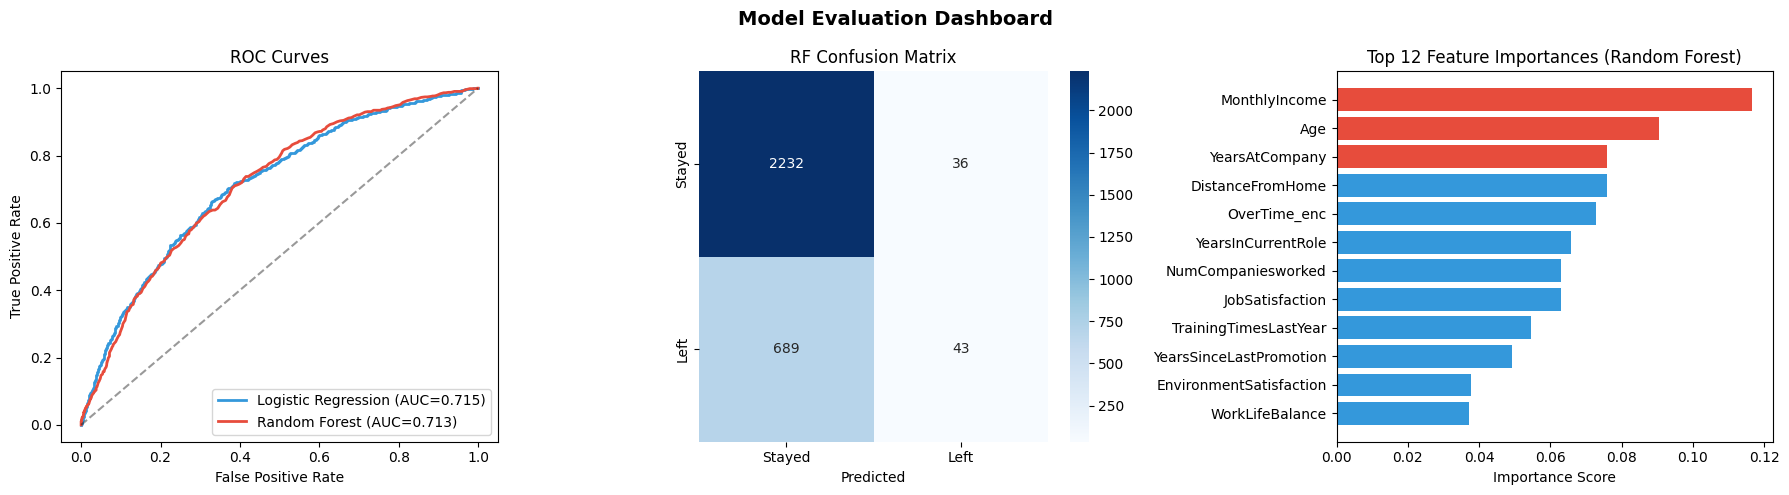

In [11]:
# ── Model Evaluation Plots ──
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Evaluation Dashboard', fontsize=14, fontweight='bold')

# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
axes[0].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={lr_auc:.3f})', color='#3498DB', lw=2)
axes[0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={rf_auc:.3f})', color='#E74C3C', lw=2)
axes[0].plot([0,1],[0,1],'k--', alpha=0.4)
axes[0].set_title('ROC Curves'); axes[0].legend()
axes[0].set_xlabel('False Positive Rate'); axes[0].set_ylabel('True Positive Rate')

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Stayed','Left'], yticklabels=['Stayed','Left'])
axes[1].set_title('RF Confusion Matrix'); axes[1].set_xlabel('Predicted')

# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=x.columns)
top12 = feat_imp.nlargest(12)
bar_colors = ['#E74C3C']*3 + ['#3498DB']*9
axes[2].barh(top12.index[::-1], top12.values[::-1], color=bar_colors[::-1])
axes[2].set_title('Top 12 Feature Importances (Random Forest)')
axes[2].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

In [14]:
# Top 3 drivers
top3 = feat_imp.nlargest(3)
print('=== Top 3 Attrition Drivers ===')
for i, (feat, score) in enumerate(top3.items(), 1):
    print(f'  {i}. {feat:<35} Importance: {score:.4f}')

# Generate at-risk watch list
all_probs = rf.predict_proba(x)[:,1]
df['AttritionRisk'] = all_probs
df['RiskCategory'] = pd.cut(all_probs, bins=[0, 0.35, 0.60, 1.0],
                              labels=['Low', 'Medium', 'High'])
df['EmployeeID'] = [f'EMP-{1000+i}' for i in range(len(df))]

watchlist = (df[df['AttritionRisk'] >= 0.60]
               .sort_values('AttritionRisk', ascending=False)
               [['EmployeeID','Department','JobRole','MonthlyIncome',
                 'YearsAtCompany','Overtime','JobSatisfaction','AttritionRisk']]
               .head(15))
watchlist['AttritionRisk%'] = (watchlist['AttritionRisk']*100).round(1)

print(f'\n=== HIGH-RISK EMPLOYEE WATCH LIST (Top 15) ===')
print(watchlist.drop('AttritionRisk', axis=1).to_string(index=False))

=== Top 3 Attrition Drivers ===
  1. MonthlyIncome                       Importance: 0.1167
  2. Age                                 Importance: 0.0906
  3. YearsAtCompany                      Importance: 0.0760

=== HIGH-RISK EMPLOYEE WATCH LIST (Top 15) ===
EmployeeID               Department                 JobRole  MonthlyIncome  YearsAtCompany Overtime  JobSatisfaction  AttritionRisk%
  EMP-3043                    Sales                 Manager           2873               3      Yes                1            88.6
  EMP-6456 Research and development       Research Director           2127               2      Yes                1            87.6
 EMP-10666                    Sales   Sales Representative            2533               5      Yes                2            87.4
  EMP-5096                    Sales                 Manager           5823               1      Yes                1            87.4
  EMP-6287                    Sales                 Manager           1899 

In [16]:
# Department risk breakdown
dept_risk = df.groupby('Department').agg(
    Total=('Attrition','count'),
    High_Risk=('RiskCategory', lambda x: (x=='High').sum()),
    Avg_Risk=('AttritionRisk', lambda x: round(x.mean()*100,1))
).reset_index()
dept_risk['High_Risk_Pct'] = (dept_risk['High_Risk']/dept_risk['Total']*100).round(1)
print(dept_risk.to_string(index=False))

# Save model
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(list(x.columns), 'feature_names.pkl')
print('\nModels saved: rf_model.pkl, scaler.pkl, feature_names.pkl')

              Department  Total  High_Risk  Avg_Risk  High_Risk_Pct
        Human Ressources   1623        306      23.7           18.9
Research and development   8380       1630      24.0           19.5
                   Sales   4997        997      24.5           20.0

Models saved: rf_model.pkl, scaler.pkl, feature_names.pkl
